## Notebook to demonstrate how to visualize results from pseudo feature decoding

### Imports

In [28]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define some constants

In [29]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# feature dimensions to look at
FEATURE_DIMS = ["Color", "Shape", "Pattern"]

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_scratch/pseudo"

SESSIONS_PATH = "/data/patrick_scratch/multi_sess/valid_sessions.pickle"


### Visualize decoding accuracy

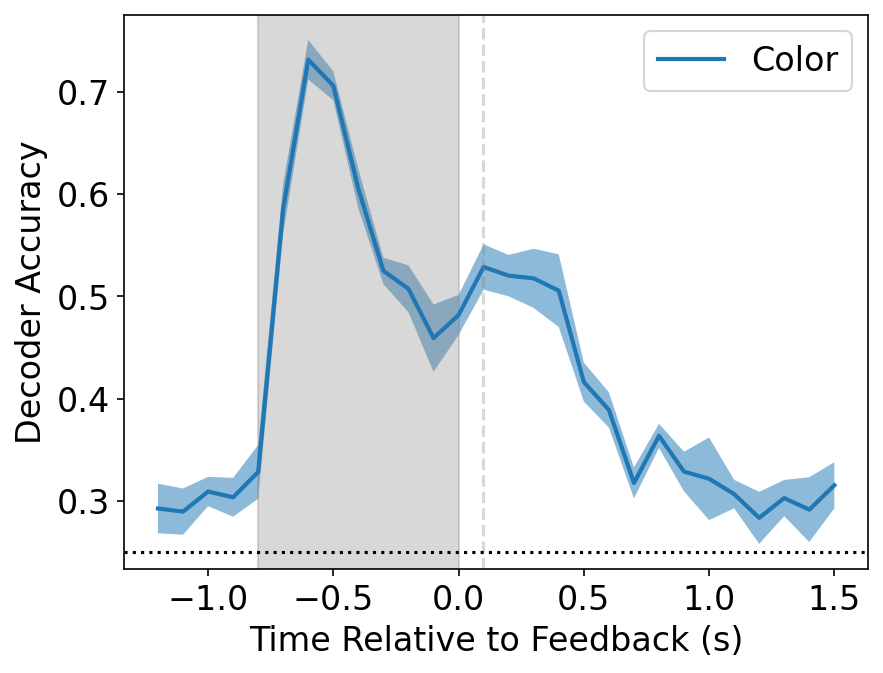

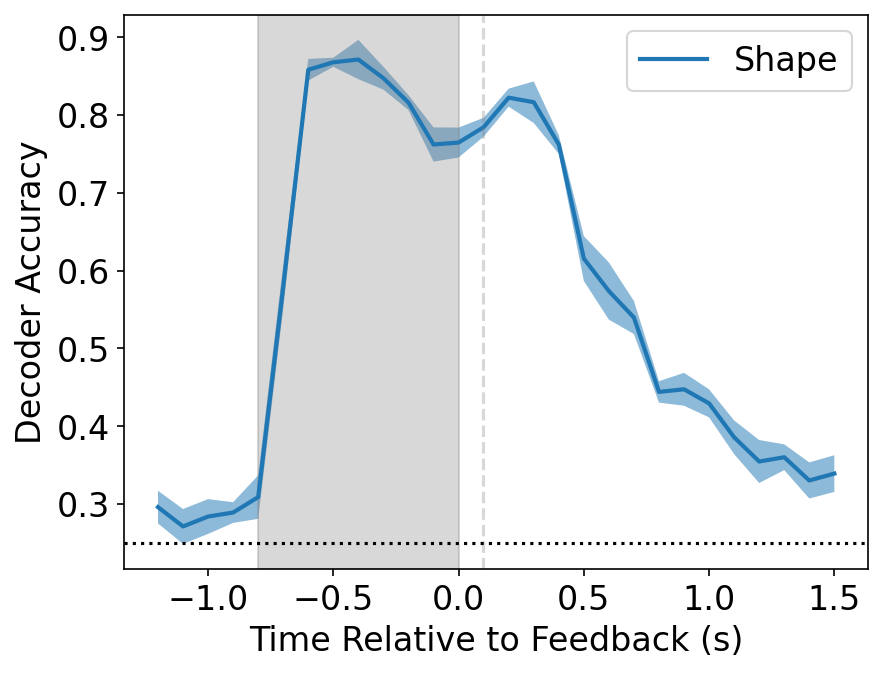

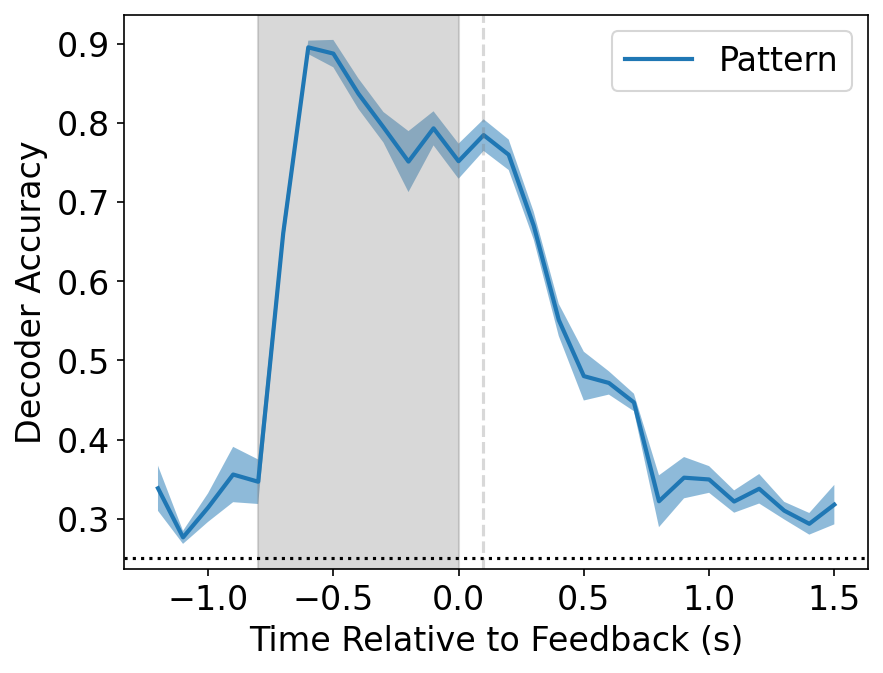

In [30]:
matplotlib.rcParams.update({'font.size': 16})
for feature_dim in FEATURE_DIMS:
    # load the test accuracy of generated from the decode_features_with_pseudo.py script
    # here I'm just visualizing test accuracy, but can very well visualize train/shuffled as well. 
    test_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_test_accs.npy"))
    fig, ax = plt.subplots(dpi=150)
    # plots the mean and standard deviation of decoding accuracy across splits, by time. 
    visualization_utils.visualize_accuracy_across_time_bins(
        test_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim}",
        right_align=True, 
    )
    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

### Find unit positions

In [35]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)
positions = positions[positions.manual_structure != "unknown"]

### Plot a glass brain
NOTE: glass brain is not visualized here, but directly saved as a html file to be downloaded later

In [ ]:
# generates a glass brain using plotly
# specifies which structural grouping to use. You may also derive your own,
# so long as its added as a column to the positions df
fig = visualization_utils.generate_glass_brain(positions, "manual_structure", None)
# directly write this figure as a html file. 
# ran into performance issues displaying the glass brain within the notebook
fig.write_html("/data/patrick_scratch/pseudo/figs/units_glass_brain_estimated_manual_struc_new.html")

### Plot unit weights wrt time

[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14
[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14
[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14


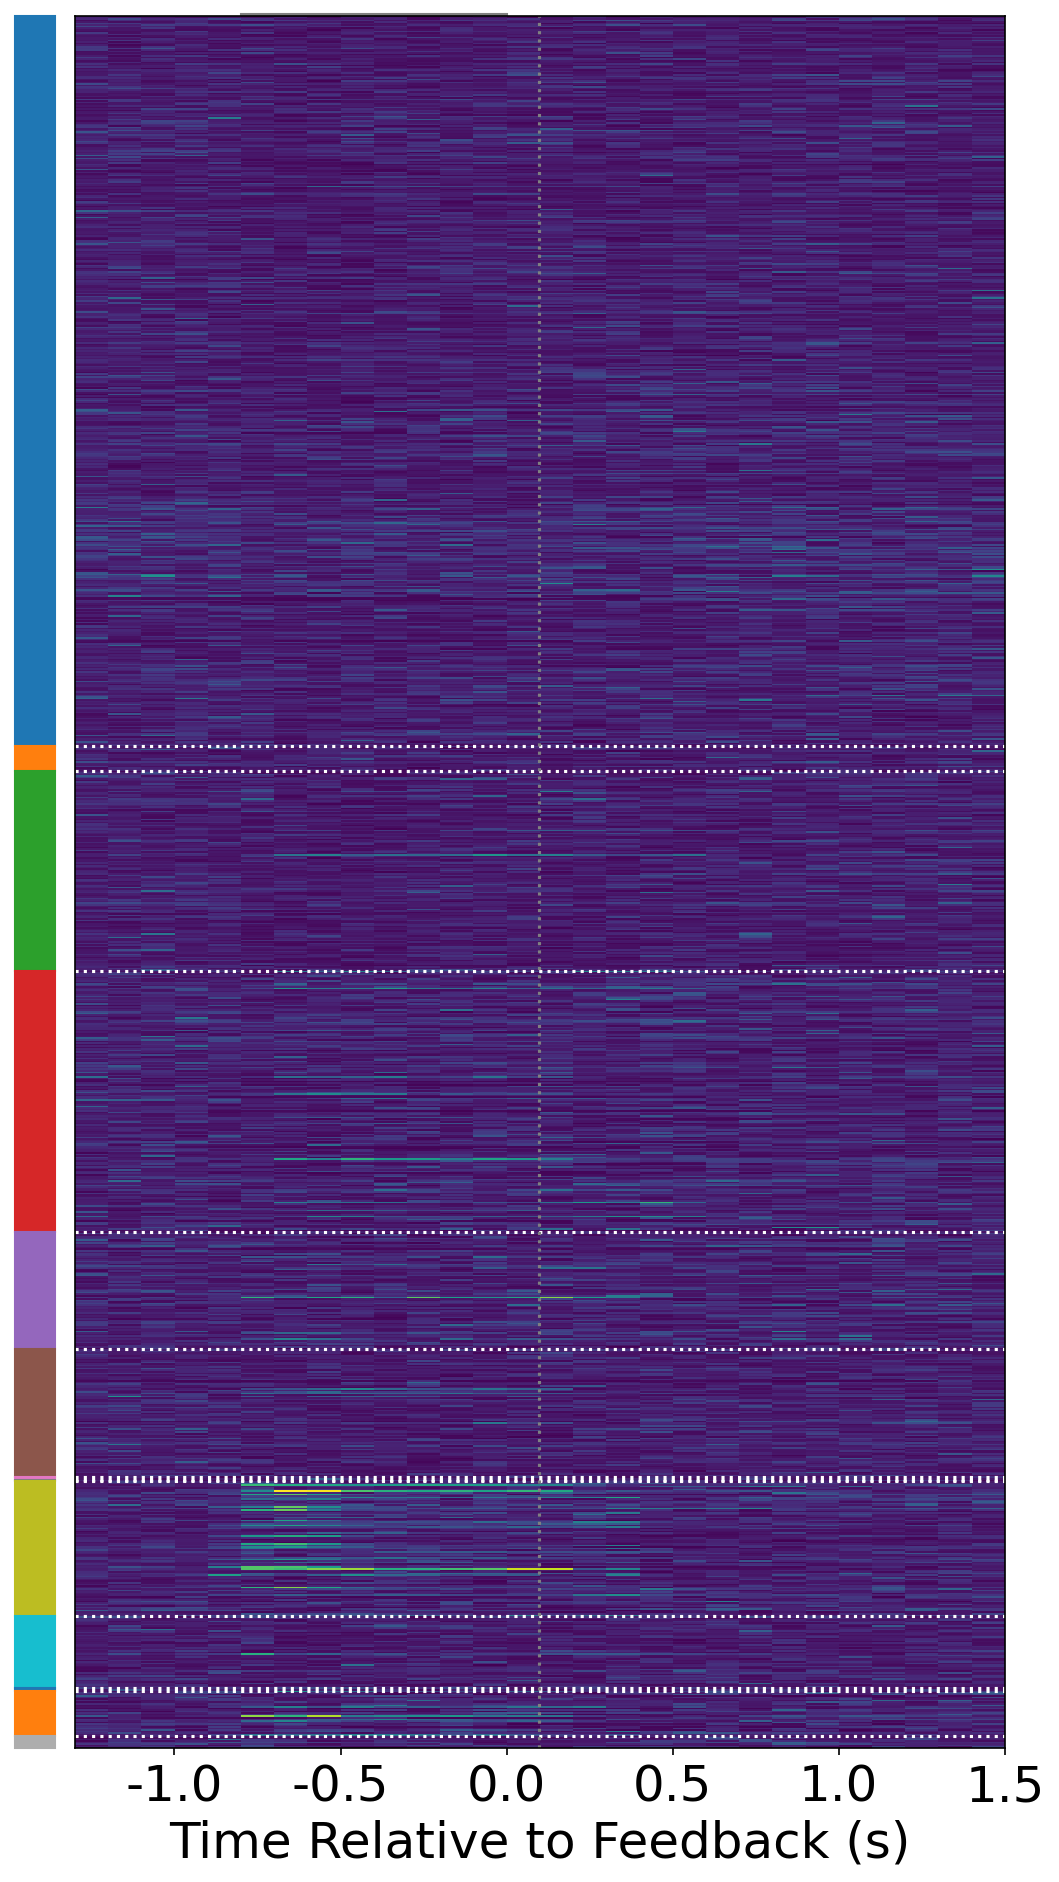

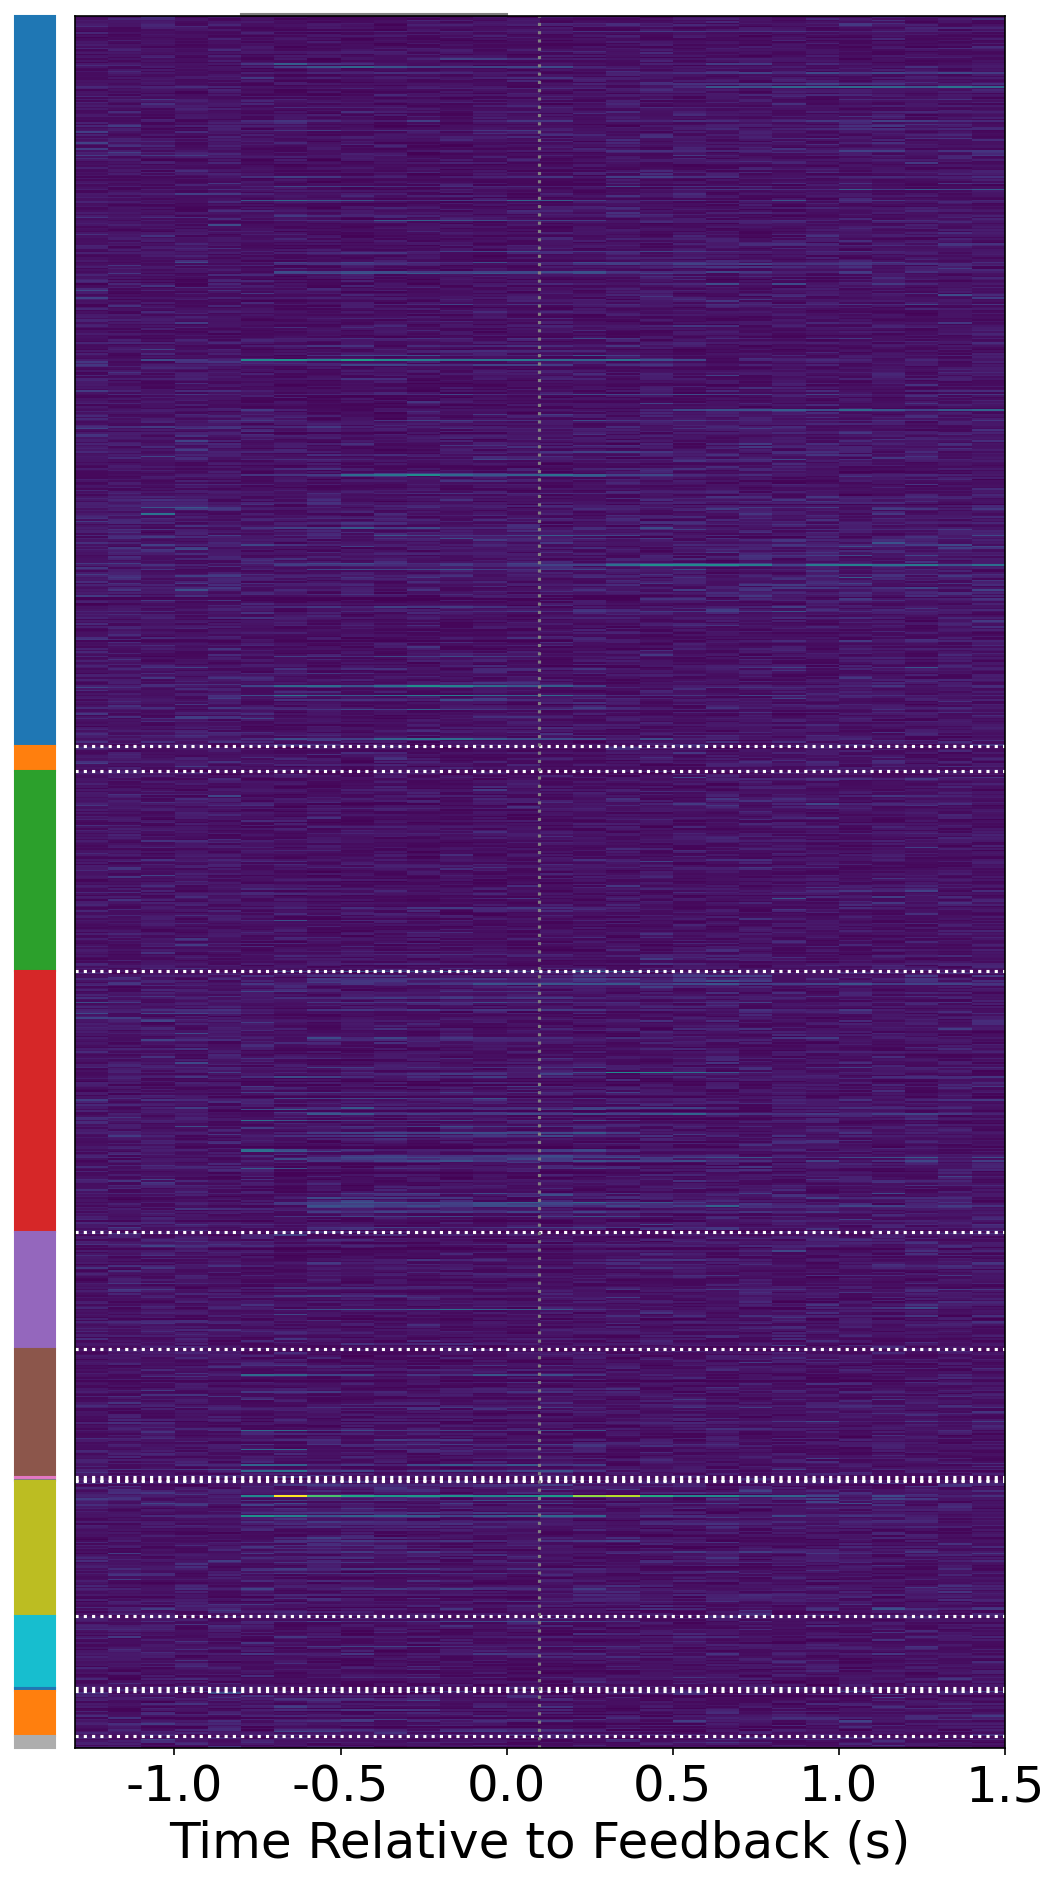

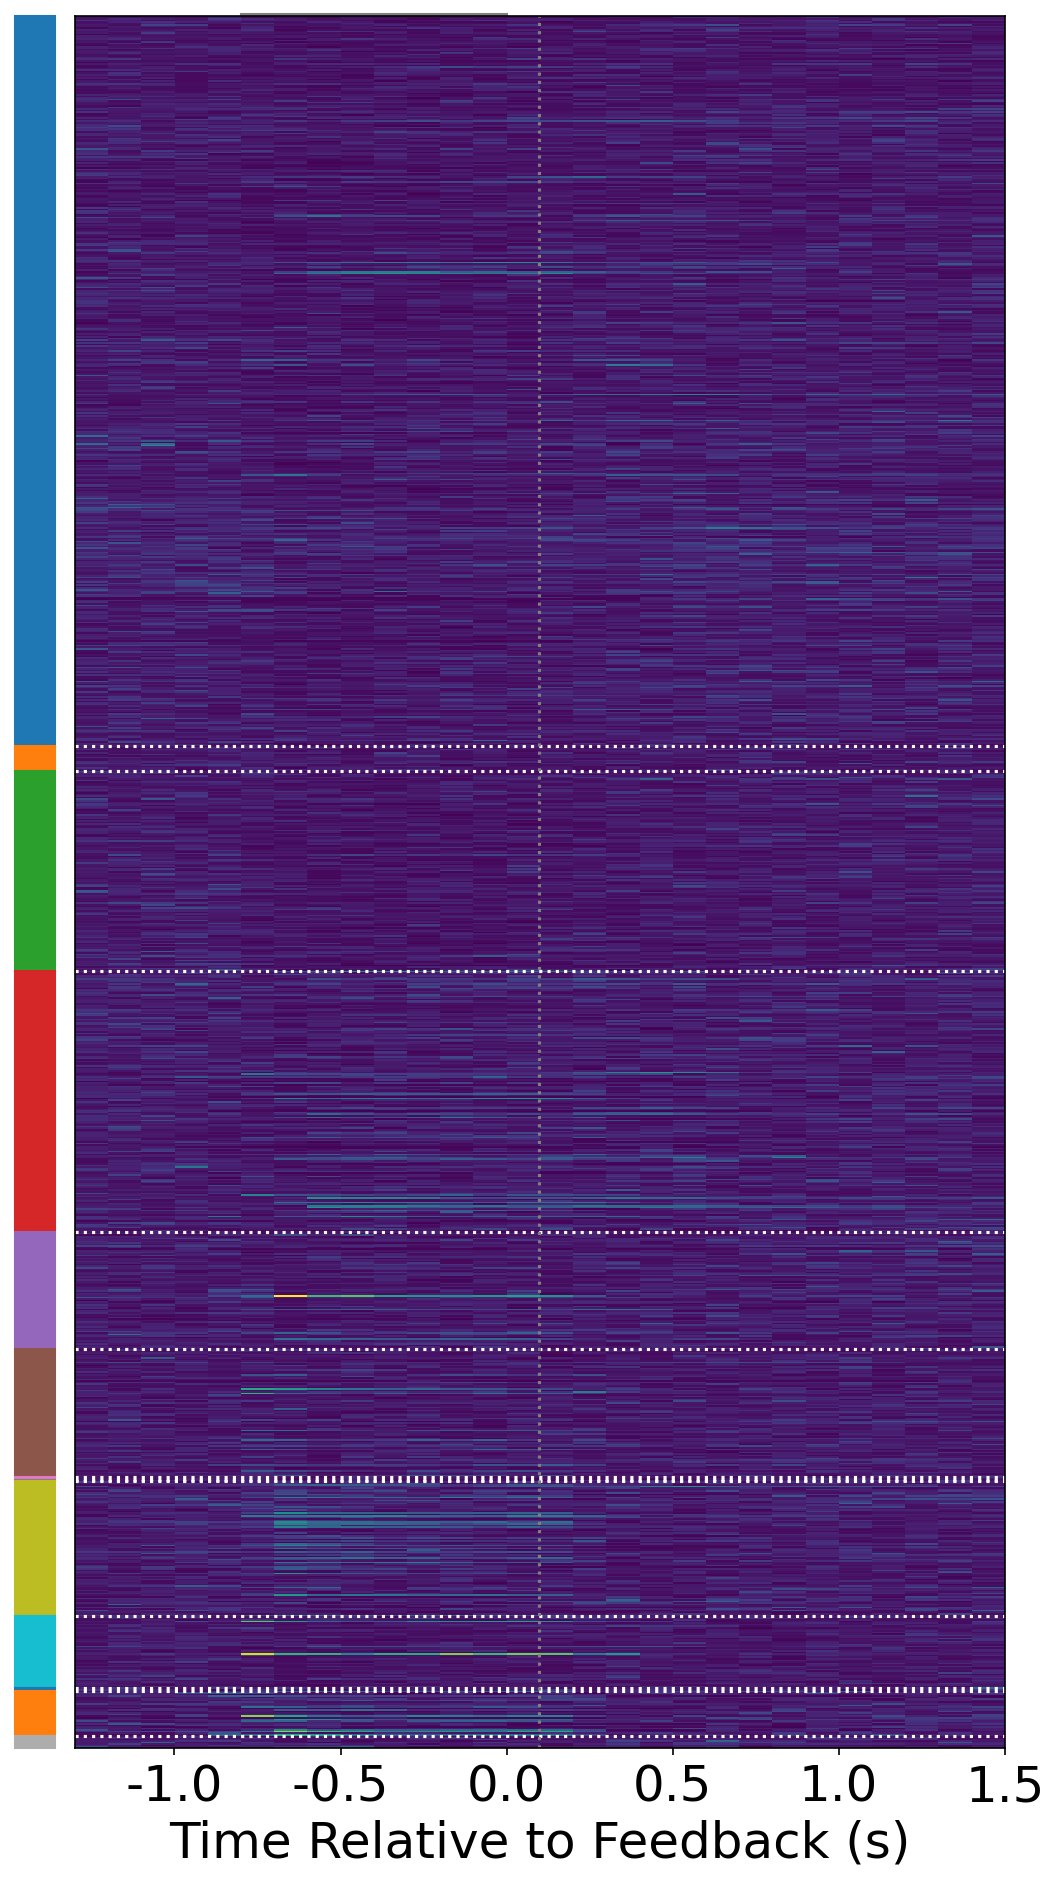

In [69]:
matplotlib.rcParams.update({'font.size': 24})
for feature_dim in FEATURE_DIMS:
    models = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_models.npy"), allow_pickle=True)

    # evaluate weights by time. Pass in number of neurons and number of classes
    weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=1117, num_classes=4)
    
    # normalize weights so that they sum to 1
    sums = np.sum(weights, axis=0)
    normalized = weights / sums
    fig, ax = plt.subplots(figsize=(8, 15), dpi=150)
    visualization_utils.visualize_weights(positions, normalized, "manual_structure", ax=ax)